# Eval

In [3]:
# I/O
import os
import glob
import json
import zlib
import base64

# Analysis
import pandas as pd
import scanpy as sc
import loompy as lp
import umap

# Load SCENIC results

In [28]:
EXP_LOOM = "/cellar/users/aklie/data/igvf/topic_grn_links/mouse_adrenal/"
OUT = "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/"

## adata object

In [29]:
adata = sc.read(EXP_LOOM, validate=False)
genes = adata.var.index
cells = adata.obs.index

In [30]:
adata.obs

,CBC,Gene,Gene.full.name,Guide,long.CBC,nGene,nUMI,n_genes,n_genes_by_counts,pct_counts_mt,sample,total_counts,total_counts_mt
CellID,,,,,,,,,,,,,
CYB561D1:GCAGTGGGATCTTGGCGCACC:CTGTACCAGACCGCCT-scRNAseq_2kG_2PMDox2_1,CTGTACCAGACCGCCT,CYB561D1,CYB561D1,GCAGTGGGATCTTGGCGCACC,CYB561D1:GCAGTGGGATCTTGGCGCACC:CTGTACCAGACCGCC...,738,2338.0,738,738,2.651839256286621,2PMDox2_1,2338.0,62.0
XRCC5:GCGCCTGAGGACCGGCAACA:GGGTGTCGTGAGGAAA-scRNAseq_2kG_11AMDox_4,GGGTGTCGTGAGGAAA,XRCC5,XRCC5,GCGCCTGAGGACCGGCAACA,XRCC5:GCGCCTGAGGACCGGCAACA:GGGTGTCGTGAGGAAA-sc...,1132,6309.0,1134,1132,4.453954696655273,11AMDox_4,6309.0,281.0
SEPT8-TSS2:GAAAGCGGAGCTCGACGGTCA:ATTCCTATCATGGGAG-scRNAseq_2kG_2PMDox1_2,ATTCCTATCATGGGAG,SEPT8,SEPT8-TSS2,GAAAGCGGAGCTCGACGGTCA,SEPT8-TSS2:GAAAGCGGAGCTCGACGGTCA:ATTCCTATCATGG...,601,1572.0,603,601,5.21628475189209,2PMDox1_2,1572.0,82.0
RGS19-TSS2:GCGGCACTTCCCCAAAGCCAG:CTCCGATCAGACCATT-scRNAseq_2kG_2PMDox1_3,CTCCGATCAGACCATT,RGS19,RGS19-TSS2,GCGGCACTTCCCCAAAGCCAG,RGS19-TSS2:GCGGCACTTCCCCAAAGCCAG:CTCCGATCAGACC...,653,1670.0,654,653,6.946107864379883,2PMDox1_3,1670.0,116.0
SCFD2:GCAGTACGCCCGAGGCGCTCA:GTCGTAAGTGAGTCAG-scRNAseq_2kG_2PMDox1_7,GTCGTAAGTGAGTCAG,SCFD2,SCFD2,GCAGTACGCCCGAGGCGCTCA,SCFD2:GCAGTACGCCCGAGGCGCTCA:GTCGTAAGTGAGTCAG-s...,494,1054.0,495,494,11.290322303771973,2PMDox1_7,1054.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATP5O:GCCACCTTTCTCTCACCTGCC:TTAGGCAGTGGATGAC-scRNAseq_2kG_2PMDox2_2,TTAGGCAGTGGATGAC,ATP5O,ATP5O,GCCACCTTTCTCTCACCTGCC,ATP5O:GCCACCTTTCTCTCACCTGCC:TTAGGCAGTGGATGAC-s...,586,1797.0,587,586,3.0050084590911865,2PMDox2_2,1797.0,54.0
SMARCC2:GCACGTTGTCGAACTGGGTCA:TCTCACGGTCTCAGAT-scRNAseq_2kG_2PMDox2_4,TCTCACGGTCTCAGAT,SMARCC2,SMARCC2,GCACGTTGTCGAACTGGGTCA,SMARCC2:GCACGTTGTCGAACTGGGTCA:TCTCACGGTCTCAGAT...,487,1381.0,490,487,4.6343231201171875,2PMDox2_4,1381.0,64.0
RNF10:GGGCCGAGGCCGACCTGCTC:GTAGCTATCTTCGACC-scRNAseq_2kG_11AMDox_1,GTAGCTATCTTCGACC,RNF10,RNF10,GGGCCGAGGCCGACCTGCTC,RNF10:GGGCCGAGGCCGACCTGCTC:GTAGCTATCTTCGACC-sc...,794,2651.0,797,794,6.374952793121338,11AMDox_1,2651.0,169.0


In [31]:
adata.var

,gene_id,gene_name,mean_counts,mt,n_cells,n_cells_by_counts,pct_dropout_by_counts,total_counts
Gene,,,,,,,,
LINC01409,ENSG00000237491,LINC01409,0.06400000303983688,False,32,32,93.6,32.0
FAM41C,ENSG00000230368,FAM41C,0.012000000104308128,False,6,6,98.8,6.0
SDF4,ENSG00000078808,SDF4,1.25,False,334,334,33.199999999999996,625.0
C1QTNF12,ENSG00000184163,C1QTNF12,0.006000000052154064,False,3,3,99.4,3.0
PUSL1,ENSG00000169972,PUSL1,0.12600000202655792,False,59,59,88.2,63.0
...,...,...,...,...,...,...,...,...
MTCP1,ENSG00000214827,MTCP1,0.006000000052154064,False,3,3,99.4,3.0
MT-ATP6,ENSG00000198899,MT-ATP6,129.74600219726562,True,500,500,0.0,64873.0
MT-ND5,ENSG00000198786,MT-ND5,14.836000442504883,True,494,494,1.200000000000001,7418.0


## GRN Inference

In [32]:
from utils import read_adj, parse_adj

In [33]:
files = sorted(glob.glob(os.path.join(OUT, "filtered_subset_adj.tsv")))
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/filtered_subset_adj.tsv']

In [34]:
read_adj(files[0])

,TF,target,importance
0,ZBTB7A,SLC25A3,157.176004
1,ZBTB7A,MT-ATP6,155.760692
2,ZBTB7A,RPL13A,153.144211
3,ZBTB7A,MYL6,145.729893
4,ZBTB7A,CRIP2,139.913374
...,...,...,...
13443,ZNF354C,LRRC37A,0.004911
13444,ZNF354C,C1QTNF12,0.003466
13445,ZNF354C,LKAAEAR1,0.003440
13446,ZNF354C,PFN4,0.003210


In [21]:
multi_adj, ranked_genes = parse_adj(files, tfs=None)

/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/utils.py:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ranks = ranks.reset_index().sort_values(["TF"]).groupby(["TF"], sort=False).apply(lambda x: x.sort_values(("rank", "mean"), ascending=True)).drop("TF", axis=1)


In [22]:
multi_adj

,TF,target,importance,file,rank
0,ZBTB7A,SLC25A3,157.176004,/cellar/users/aklie/projects/igvf/topic_grn_li...,1
1,ZBTB7A,MT-ATP6,155.760692,/cellar/users/aklie/projects/igvf/topic_grn_li...,2
2,ZBTB7A,RPL13A,153.144211,/cellar/users/aklie/projects/igvf/topic_grn_li...,3
3,ZBTB7A,MYL6,145.729893,/cellar/users/aklie/projects/igvf/topic_grn_li...,4
4,ZBTB7A,CRIP2,139.913374,/cellar/users/aklie/projects/igvf/topic_grn_li...,5
...,...,...,...,...,...
13443,ZNF354C,LRRC37A,0.004911,/cellar/users/aklie/projects/igvf/topic_grn_li...,3358
13444,ZNF354C,C1QTNF12,0.003466,/cellar/users/aklie/projects/igvf/topic_grn_li...,3359
13445,ZNF354C,LKAAEAR1,0.003440,/cellar/users/aklie/projects/igvf/topic_grn_li...,3360
13446,ZNF354C,PFN4,0.003210,/cellar/users/aklie/projects/igvf/topic_grn_li...,3361


In [16]:
ranked_genes

TF       target    rank    importance          
                                       mean          mean       std
0        2310011J03Rik      Mir6236     1.5  1.293538e+01  7.089223
1        2310011J03Rik        Bscl2     4.5  7.340578e+00  1.437614
2        2310011J03Rik        Usp25     4.5  7.574090e+00  1.907232
3        2310011J03Rik      Shroom3     5.0  7.129836e+00  0.373359
4        2310011J03Rik      Zscan26     5.0  7.278688e+00  0.870425
...                ...          ...     ...           ...       ...
1097247        Zscan26      Ccdc194  3177.0  3.514155e-12  0.000000
1097248        Zscan26       Gm9305  3178.0  1.923953e-12  0.000000
1097249        Zscan26  Tmem167-ps2  3179.0  1.141580e-13  0.000000
1097250        Zscan26        Spag1  3180.0  3.142649e-14  0.000000
1097251        Zscan26      Gm13572  3182.0  1.056043e-14  0.000000

[1097252 rows x 5 columns]

## Loom files - regulons and AUC

In [23]:
from utils import parse_loom

In [35]:
files = sorted(glob.glob(os.path.join(OUT, "filtered_subset_pyscenic_output.loom")))
files

['/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/filtered_subset_pyscenic_output.loom']

In [36]:
tf_regulons, tf_activities = parse_loom(files, tf="ZBTB7A", cells=cells, genes=genes)

/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/filtered_subset_pyscenic_output.loom


In [38]:
tf_regulons

Gene
CLSTN1      1
TUBA1C      1
GIT2        1
CKAP4       1
C12orf75    1
           ..
CXXC5       1
PAIP2       1
SIL1        1
HNRNPA0     1
CMC4        1
Length: 308, dtype: int64

In [39]:
tf_activities

,/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/filtered_subset_pyscenic_output.loom
CellID,
CYB561D1:GCAGTGGGATCTTGGCGCACC:CTGTACCAGACCGCCT-scRNAseq_2kG_2PMDox2_1,0.037415
XRCC5:GCGCCTGAGGACCGGCAACA:GGGTGTCGTGAGGAAA-scRNAseq_2kG_11AMDox_4,0.038246
SEPT8-TSS2:GAAAGCGGAGCTCGACGGTCA:ATTCCTATCATGGGAG-scRNAseq_2kG_2PMDox1_2,0.027617
RGS19-TSS2:GCGGCACTTCCCCAAAGCCAG:CTCCGATCAGACCATT-scRNAseq_2kG_2PMDox1_3,0.046440
SCFD2:GCAGTACGCCCGAGGCGCTCA:GTCGTAAGTGAGTCAG-scRNAseq_2kG_2PMDox1_7,0.041628
...,...
ATP5O:GCCACCTTTCTCTCACCTGCC:TTAGGCAGTGGATGAC-scRNAseq_2kG_2PMDox2_2,0.032294
SMARCC2:GCACGTTGTCGAACTGGGTCA:TCTCACGGTCTCAGAT-scRNAseq_2kG_2PMDox2_4,0.038826
RNF10:GGGCCGAGGCCGACCTGCTC:GTAGCTATCTTCGACC-scRNAseq_2kG_11AMDox_1,0.039116


## Visualize the AUC matrix

In [40]:
files[0]

'/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/scenic/results/endothelial_perturb_seq/filtered_subset_pyscenic_output.loom'

In [41]:
# collect SCENIC AUCell output
lf = lp.connect(files[0], mode='r+', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

# create a dictionary of regulons:
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)
lf.close()

In [44]:
regulons["ZBTB7A(+)"][:5]

['CLSTN1', 'DDI2', 'ZBTB17', 'LUZP1', 'ID3']

In [45]:
auc_mtx["ZBTB7A(+)"]

CYB561D1:GCAGTGGGATCTTGGCGCACC:CTGTACCAGACCGCCT-scRNAseq_2kG_2PMDox2_1      0.037415
XRCC5:GCGCCTGAGGACCGGCAACA:GGGTGTCGTGAGGAAA-scRNAseq_2kG_11AMDox_4          0.038246
SEPT8-TSS2:GAAAGCGGAGCTCGACGGTCA:ATTCCTATCATGGGAG-scRNAseq_2kG_2PMDox1_2    0.027617
RGS19-TSS2:GCGGCACTTCCCCAAAGCCAG:CTCCGATCAGACCATT-scRNAseq_2kG_2PMDox1_3    0.046440
SCFD2:GCAGTACGCCCGAGGCGCTCA:GTCGTAAGTGAGTCAG-scRNAseq_2kG_2PMDox1_7         0.041628
                                                                              ...   
ATP5O:GCCACCTTTCTCTCACCTGCC:TTAGGCAGTGGATGAC-scRNAseq_2kG_2PMDox2_2         0.032294
SMARCC2:GCACGTTGTCGAACTGGGTCA:TCTCACGGTCTCAGAT-scRNAseq_2kG_2PMDox2_4       0.038826
RNF10:GGGCCGAGGCCGACCTGCTC:GTAGCTATCTTCGACC-scRNAseq_2kG_11AMDox_1          0.039116
ZNF768:GCGCCTCCCGCTCCATCCCCG:TGCTTCGGTCGCGTCA-scRNAseq_2kG_2PMDox2_4        0.036255
CPNE2:GAGCAGCTCCCGGGGATGCC:ACCCTTGCATGACTCA-scRNAseq_2kG_11AMDox_1          0.048759
Name: ZBTB7A(+), Length: 500, dtype: float64

In [46]:
# UMAP
run_umap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform

In [47]:
dr_umap = run_umap(auc_mtx)

In [48]:
umap_df = pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index)

In [49]:
umap_df

,X,Y
CYB561D1:GCAGTGGGATCTTGGCGCACC:CTGTACCAGACCGCCT-scRNAseq_2kG_2PMDox2_1,11.730923,2.364985
XRCC5:GCGCCTGAGGACCGGCAACA:GGGTGTCGTGAGGAAA-scRNAseq_2kG_11AMDox_4,11.018894,4.572450
SEPT8-TSS2:GAAAGCGGAGCTCGACGGTCA:ATTCCTATCATGGGAG-scRNAseq_2kG_2PMDox1_2,15.351581,2.228661
RGS19-TSS2:GCGGCACTTCCCCAAAGCCAG:CTCCGATCAGACCATT-scRNAseq_2kG_2PMDox1_3,14.834724,0.937087
SCFD2:GCAGTACGCCCGAGGCGCTCA:GTCGTAAGTGAGTCAG-scRNAseq_2kG_2PMDox1_7,11.347787,3.861448
...,...,...
ATP5O:GCCACCTTTCTCTCACCTGCC:TTAGGCAGTGGATGAC-scRNAseq_2kG_2PMDox2_2,12.589616,2.796686
SMARCC2:GCACGTTGTCGAACTGGGTCA:TCTCACGGTCTCAGAT-scRNAseq_2kG_2PMDox2_4,12.127440,2.423154
RNF10:GGGCCGAGGCCGACCTGCTC:GTAGCTATCTTCGACC-scRNAseq_2kG_11AMDox_1,12.658781,3.128860
ZNF768:GCGCCTCCCGCTCCATCCCCG:TGCTTCGGTCGCGTCA-scRNAseq_2kG_2PMDox2_4,12.521778,2.098056


In [50]:
import matplotlib.pyplot as plt

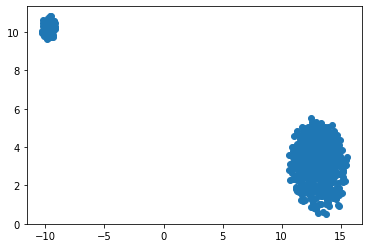

In [51]:
plt.scatter(umap_df["X"], umap_df["Y"])

---

# Scratch